In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor, NeighborhoodComponentsAnalysis
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier

In [2]:
cancer = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
df = cancer.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns=["id", "Unnamed: 32"], axis = 1, inplace=True)

# Fill Missing Value

In [4]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# EXAMINE TARGET VARIABLE AND LABEL ENCODER

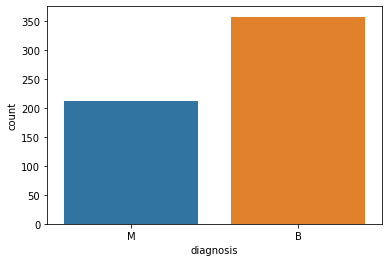

In [5]:
sns.countplot(df["diagnosis"], )

In [6]:
le = LabelEncoder()
df["Diagnosis"] = le.fit_transform(df["diagnosis"])
df.drop(columns=["diagnosis"], axis=1, inplace=True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# EDA

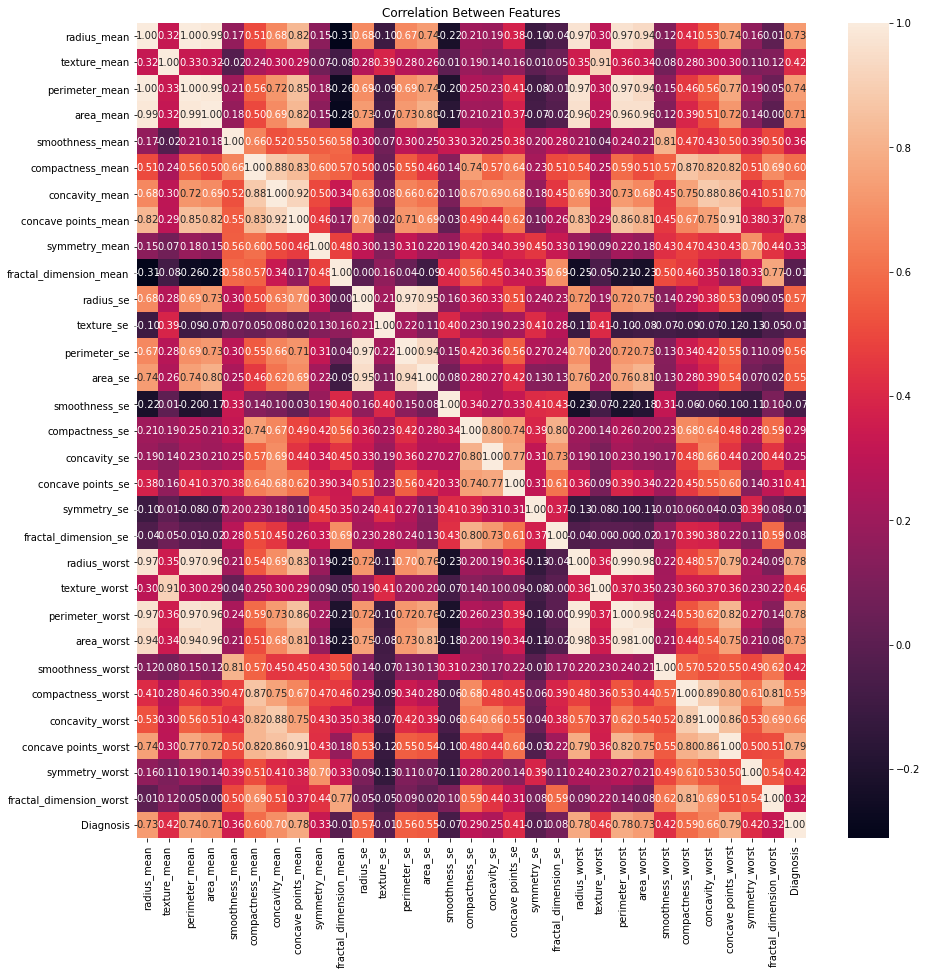

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(15,15))
plt.title("Correlation Between Features")
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

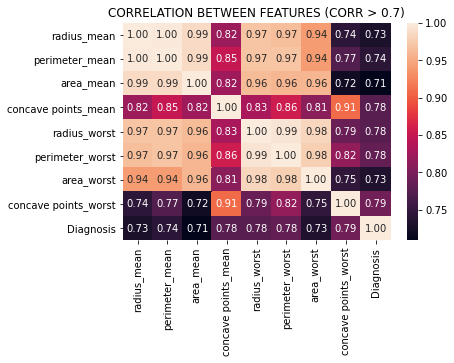

In [8]:
threshold = 0.7
filter = np.abs(corr_matrix["Diagnosis"]) > threshold
corr_features = corr_matrix.columns[filter].tolist()
plt.title("CORRELATION BETWEEN FEATURES (CORR > 0.7)")
sns.heatmap(df[corr_features].corr(), annot=True, fmt=".2f")

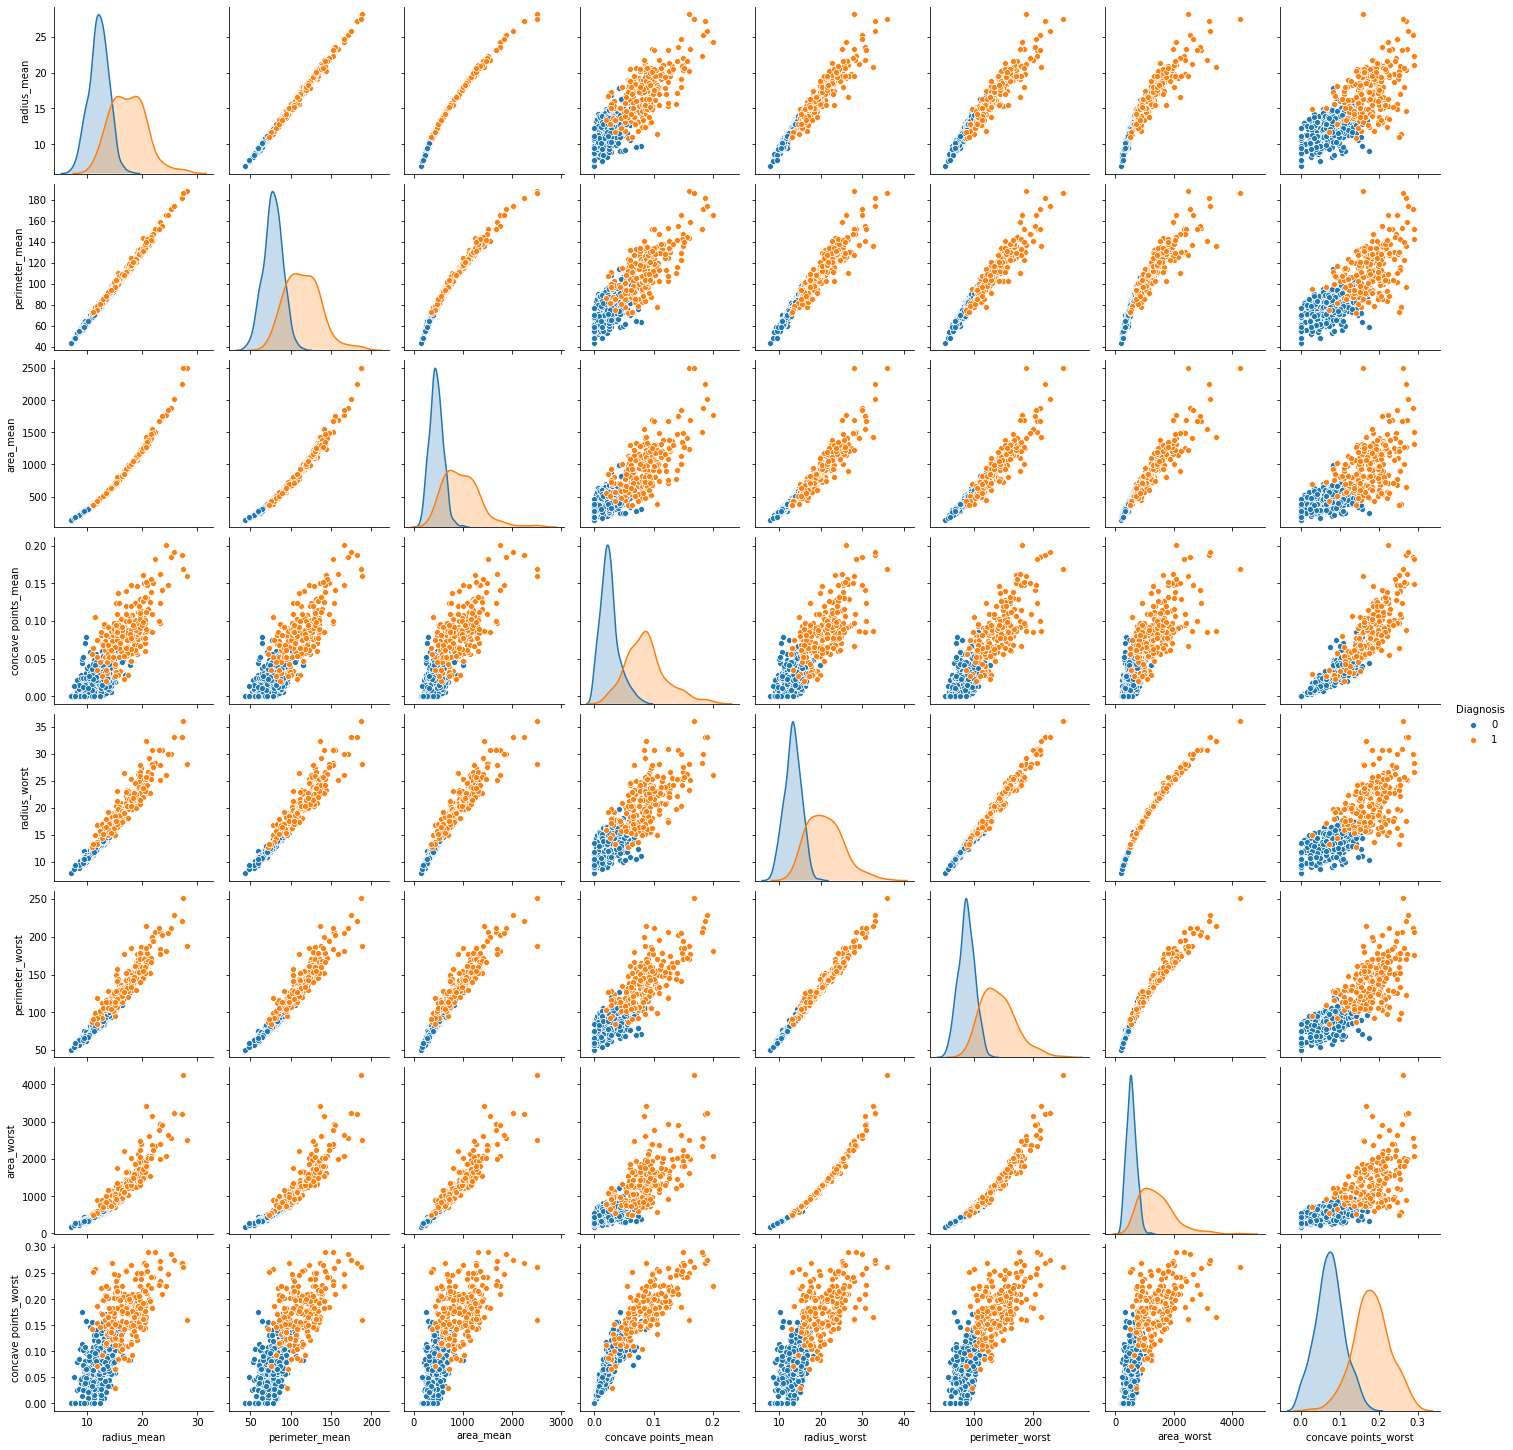

In [9]:
sns.pairplot(df[corr_features], hue="Diagnosis")

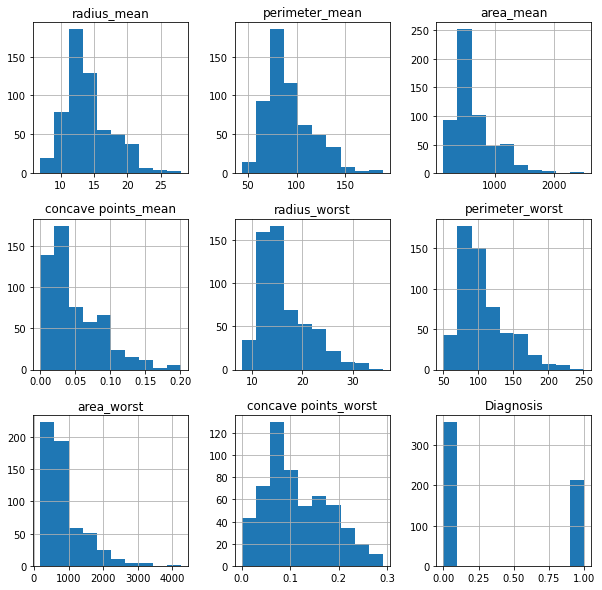

In [10]:
df.hist(corr_features, figsize=(10,10));

In [11]:
def OutliersBox(df, nameOfFeature):
    trace0 = go.Box(y = df[nameOfFeature],
                    name = "All Points",
                    jitter = 0.3,
                    pointpos = -1.8,
                    boxpoints = "all")
    trace1 = go.Box(y = df[nameOfFeature],
                    name = "Only Whiskers",
                    boxpoints = False)
    trace2 = go.Box(y = df[nameOfFeature],
                    name = "Suspected Outliers",
                    boxpoints = "suspectedoutliers",
                    marker = dict(color = 'rgb(8,81,156)',
                                outliercolor = 'rgba(219, 64, 82, 0.6)', line = dict(outliercolor = 'rgba(219, 64, 82, 0.6)',
                                                                                     outlierwidth = 2)),
                    line = dict(color = 'rgb(8,81,156)') )
    trace3 = go.Box(y = df[nameOfFeature],
                    name = "Whiskers and Outliers",
                    boxpoints = "outliers")
    
    data_ = [trace0, trace1, trace2, trace3]
    layout_ = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )
    fig = go.Figure(data=data_, layout = layout_)
    py.iplot(fig, filename = "Outliers")

In [12]:
OutliersBox(df, corr_features[0])

In [13]:
OutliersBox(df, corr_features[1])

In [14]:
OutliersBox(df, corr_features[2])

In [15]:
OutliersBox(df, corr_features[3])

In [16]:
OutliersBox(df, corr_features[4])

In [17]:
OutliersBox(df, corr_features[5])

In [18]:
OutliersBox(df, corr_features[6])

In [19]:
OutliersBox(df, corr_features[7])

In [20]:
y = df.Diagnosis
X = df.drop(["Diagnosis"], axis=1)
columns = X.columns.tolist()
clf = LocalOutlierFactor()
y_pred_outlier = clf.fit_predict(X)
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
threshold = -1.75
filter_outlier = outlier_score["score"] < threshold
outlier_index = outlier_score[filter_outlier].index.tolist()

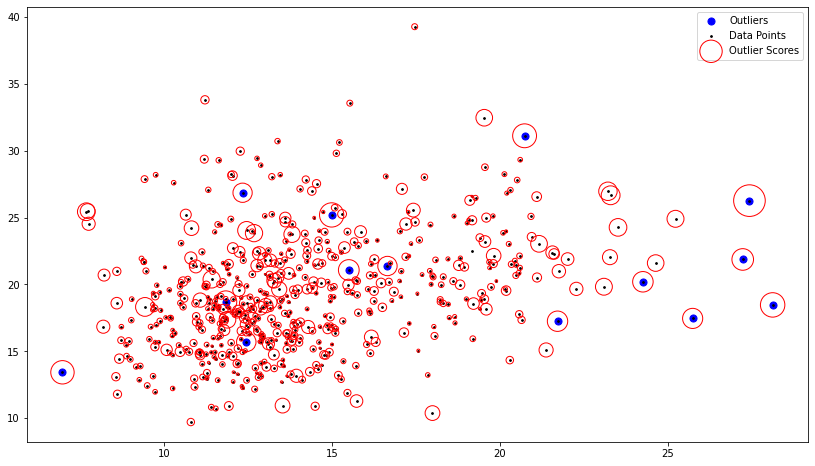

In [21]:
plt.figure(figsize=(14,8))
plt.scatter(X.iloc[outlier_index,0], X.iloc[outlier_index,1], color="blue", s=50,
            label="Outliers")
plt.scatter(X.iloc[:,0], X.iloc[:,1], color="k", s=3, label="Data Points")

radius = (X_score.max() - X_score) / (X_score.max() - X_score.min()) 
outlier_score["radius"] = radius
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=1000*radius, edgecolors="r", 
            facecolors="none", label="Outlier Scores")
plt.legend()
plt.show()

In [22]:
X = X.drop(outlier_index)
y = y.drop(outlier_index).values

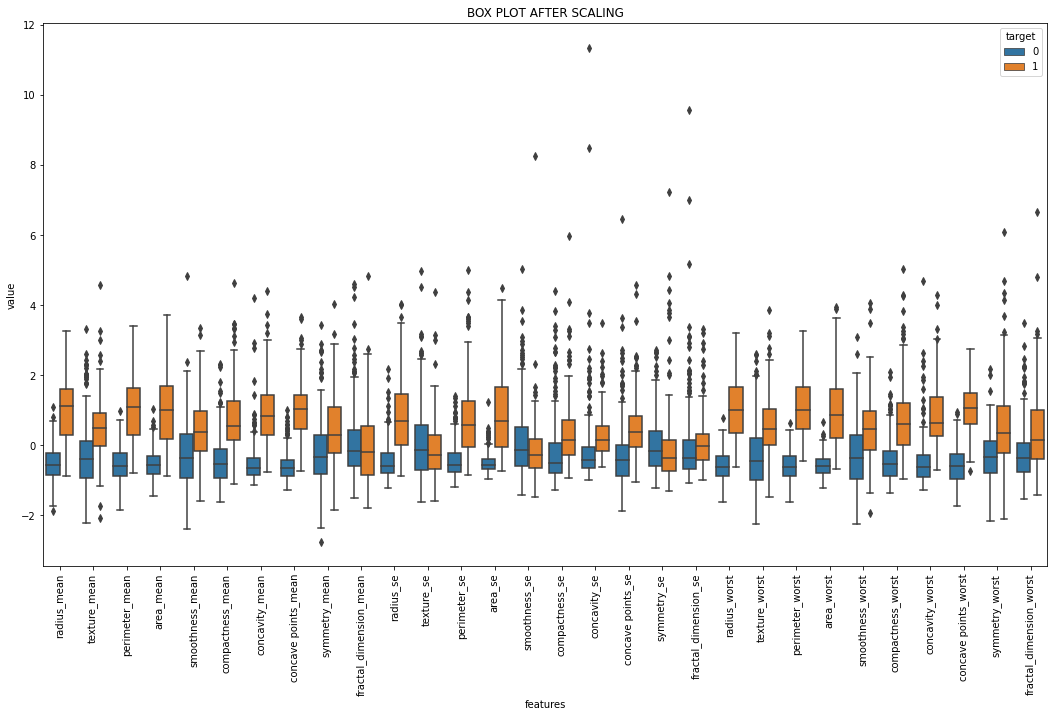

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_df = pd.DataFrame(X_train_scaled, columns=columns)
X_train_df["target"] = y_train
data_melted_2 = pd.melt(X_train_df, id_vars="target",
                        var_name="features",
                        value_name="value")
plt.figure(figsize=(18,10))
plt.title("BOX PLOT AFTER SCALING")
sns.boxplot(x="features", y="value", hue="target", data=data_melted_2)
plt.xticks(rotation=90);

In [24]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [26]:
def KNN_best_params(X_train, X_test, y_train, y_test):
    k_range = np.arange(1,31)
    weight = ["uniform", "distance"]
    params = dict(n_neighbors = k_range, weights = weight)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, params, cv=10, scoring="accuracy", n_jobs=-1, verbose=2)
    grid.fit(X_train, y_train)
    
    print("Best training score: {} wtih params: {}".format(grid.best_score_,grid.best_params_))
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    y_pred_proba = knn.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    print("Test Score: {}, Train Score: {}".format(acc_test,acc_train))
    print("CM TEST")
    print(cm_test)
    print("CM TRAIN")
    print(cm_train)
    print("Precision Score", precision_score(y_test, y_pred_test))
    print("recall Score",recall_score(y_test, y_pred_test))
    print("ROC Score", roc_auc_score(y_test, y_pred_proba))
    plot_roc_curve(fpr, tpr, thresholds)
    return grid


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.9s


Best training score: 0.9661111111111111 wtih params: {'n_neighbors': 3, 'weights': 'uniform'}
Test Score: 0.972972972972973, Train Score: 0.9842342342342343
CM TEST
[[71  0]
 [ 3 37]]
CM TRAIN
[[285   0]
 [  7 152]]
Precision Score 1.0
recall Score 0.925
ROC Score 0.9848591549295775


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.2s finished


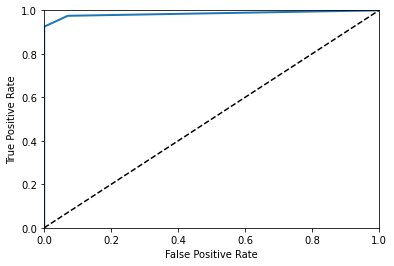

In [27]:
grid = KNN_best_params(X_train_scaled, X_test_scaled, y_train, y_test)

In [28]:
def lgbm_best_params(X_train, X_test, y_train, y_test):
    lgbm_params = {"n_estimators" : [100,200,500,1000,2000],
               "subsample" : [0.6,0.8,1.0],
               "max_depth" : [5,10,15,20,25,30,35],
               "learning_rate" : [0.1, 0.01, 0.02, 0.5],
               "min_child_samples" : np.arange(2,50)}
    lgbm = LGBMClassifier()
    random = RandomizedSearchCV(lgbm, lgbm_params, cv=10, random_state=1, n_jobs=-1, verbose=2)
    #grid = GridSearchCV(lgbm, lgbm_params, cv=10, verbose=2, n_jobs=-1)
    random.fit(X_train, y_train)
    
    print("Best training score: {} wtih params: {}".format(random.best_score_,random.best_params_))
    
    lgbm = LGBMClassifier(**random.best_params_)
    lgbm.fit(X_train, y_train)
    y_pred_test = lgbm.predict(X_test)
    y_pred_train = lgbm.predict(X_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    y_pred_proba = lgbm.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    print("Test Score: {}, Train Score: {}".format(acc_test,acc_train))
    print("CM TEST")
    print(cm_test)
    print("CM TRAIN")
    print(cm_train)
    print("Precision Score", precision_score(y_test, y_pred_test))
    print("recall Score",recall_score(y_test, y_pred_test))
    print("ROC Score", roc_auc_score(y_test, y_pred_proba))
    plot_roc_curve(fpr, tpr, thresholds)
    
    return grid

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.7s finished


Best training score: 0.9708585858585858 wtih params: {'subsample': 0.6, 'n_estimators': 2000, 'min_child_samples': 34, 'max_depth': 10, 'learning_rate': 0.5}
Test Score: 0.9459459459459459, Train Score: 1.0
CM TEST
[[70  1]
 [ 5 35]]
CM TRAIN
[[285   0]
 [  0 159]]
Precision Score 0.9722222222222222
recall Score 0.875
ROC Score 0.9855633802816901


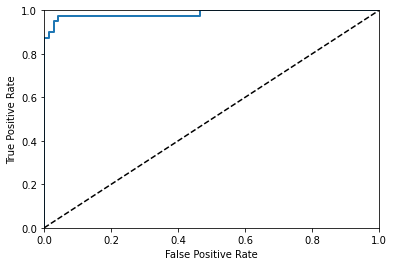

In [29]:
random_lgbm = lgbm_best_params(X_train_scaled, X_test_scaled, y_train, y_test)

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_reduced_pca = pca.transform(X_scaled)

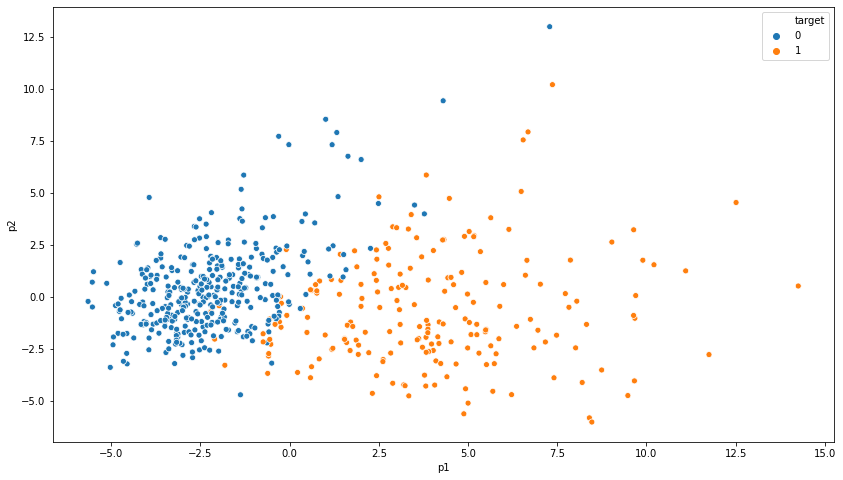

In [32]:
pca_data = pd.DataFrame(X_reduced_pca, columns=["p1","p2"])
pca_data["target"] = y
plt.figure(figsize=(14,8))
sns.scatterplot(x="p1", y="p2", hue="target", data=pca_data)

In [33]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced_pca, y, test_size = 0.20, random_state = 3, stratify=y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s


Best training score: 0.9482828282828283 wtih params: {'n_neighbors': 12, 'weights': 'uniform'}
Test Score: 0.9099099099099099, Train Score: 0.9459459459459459
CM TEST
[[69  2]
 [ 8 32]]
CM TRAIN
[[278   7]
 [ 17 142]]
Precision Score 0.9411764705882353
recall Score 0.8
ROC Score 0.9702464788732394


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.0s finished


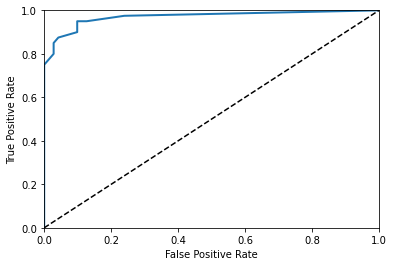

In [34]:
grid_pca = KNN_best_params(X_train_pca, X_test_pca, y_train_pca, y_test_pca)

In [35]:
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=42)
nca.fit(X_scaled, y)
X_reduced_nca = nca.transform(X_scaled)

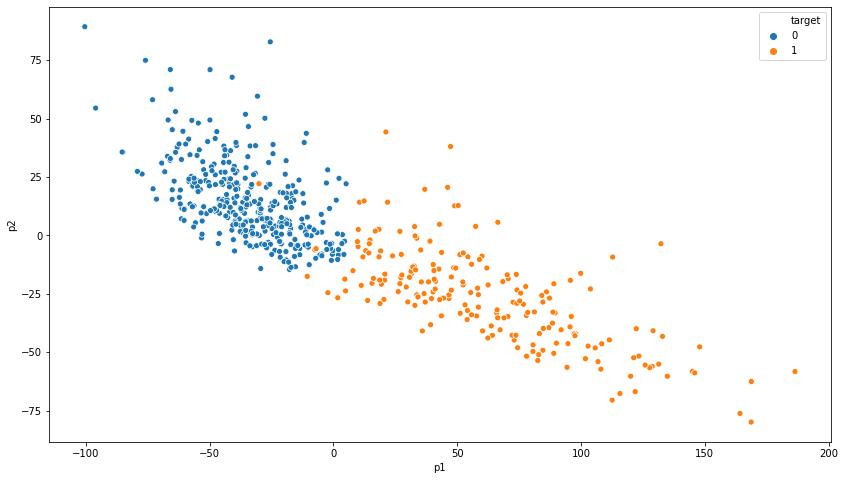

In [36]:
nca_data = pd.DataFrame(X_reduced_nca, columns=["p1","p2"])
nca_data["target"] = y
plt.figure(figsize=(14,8))
sns.scatterplot(x="p1", y="p2", hue="target", data=nca_data)

In [37]:
X_train_nca, X_test_nca, y_train_nca, y_test_nca = train_test_split(X_reduced_nca, y, test_size = 0.20, random_state = 3, stratify=y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s


Best training score: 0.9977272727272727 wtih params: {'n_neighbors': 1, 'weights': 'uniform'}
Test Score: 0.990990990990991, Train Score: 1.0
CM TEST
[[71  0]
 [ 1 39]]
CM TRAIN
[[285   0]
 [  0 159]]
Precision Score 1.0
recall Score 0.975
ROC Score 0.9875


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.0s finished


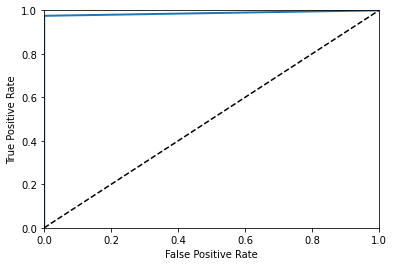

In [38]:
grid_nca = KNN_best_params(X_train_nca, X_test_nca, y_train_nca, y_test_nca)

# As a result we have 0.99 accuracy score